# Analysis Appendix e/m Lab5 Benedikt Gregor
## Data and calculations

In [38]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import pandas as pd
# : Clockwise electron beam data collected for D = (8.00 ± 0.05) cm.
# all anode voltages are corrected by subtracting 1% to account for a resistor
vc8_r = np.array([149.6, 170.4, 190.1, 209.4, 230.0, 250.2]); vc8 = vc8_r-vc8_r*(1/100)
ic8 = np.array([1.277, 1.359, 1.449, 1.534, 1.614, 1.688])
# : Counter-clockwise electron beam data collected for D = (8.00 ± 0.05) cm.
vcc8_r = np.array([150.3, 170.0, 189.6, 209.9, 229.4, 249.9]); vcc8 = vcc8_r-vcc8_r*(1/100)
icc8 = np.array([1.124, 1.226, 1.320, 1.400, 1.472, 1.556])

# : Clockwise electron beam data collected for D = (10.00 ± 0.05) cm.
vc10_r = np.array([149.9, 170.0, 189.8, 210.0, 230.0, 249.7]); vc10 = vc10_r-vc10_r*(1/100)
ic10 = np.array([1.004, 1.09, 1.166, 1.235, 1.289, 1.350])
# : Counter-clockwise electron beam data collected for D = (10.00 ± 0.05) cm.
vcc10_r = np.array([149.8, 170.3, 189.9, 209.9, 229.8, 250.3]); vcc10 = vcc10_r-vcc10_r*(1/100)
icc10 = np.array([0.888, 0.961, 1.032, 1.102, 1.163, 1.224])

v_error = 0.1 # in [V]
i_error = 0.001 # in [A]

rR = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
BB0 = np.array([1, 0.99996, 0.99928, 0.99621, 0.98728, 0.96663, 0.92525, 0.85121, 0.73324, 0.56991, 0.38007])

# interpolating data for somewhat accurate value of B/B0 without having to round or make a guess
f = interp1d(rR, BB0)

# measured radius of electron orbit
r8 = 4/100 # radius of 8cm electron circle in cm converted to m
r10 = 5/100 # radius of 8cm electron circle in cm converted to m

# K given by manufacturer
K = 7.73e-4 # in T/A
K_error = 0.04e-4#
# B0 = K*I
# Radius of Helmholtz coils 
R = 15.4/100 # in cm converted to m
R_error = 0.5/100 # in cm converted to m 

n = 130 # number of turns on each coil
# r/R value for relative distance from center of loops
rR8 = r8/R
rR10 = r10/R
# using new function generated from interpolation to get values at new r/R 
BB08 = f(rR8)
BB010 = f(rR10)
#print(BB08, BB010)
#x = np.linspace(0, 1, 100)
#y = f(x)
#plt.plot(x, y)
#plt.show()
# new Kr which is used to correct the calculations (because of not completely uniform field)
Kr8 = BB08*K
Kr10 = BB010*K

Kr8_error = (K_error/K)*Kr8
Kr10_error = (K_error/K)*Kr10

print("Kr for d = 8cm electron circle = ", round(Kr8*10000, 4), "e-4 +-", round(Kr8_error, 8), "T/A")
print("Kr for d = 10cm electron circle = ", round(Kr10*10000, 4), "e-4 +-", round(Kr10_error, 8), "T/A")

# Calculating BT and BE according to 0.5*Kr*(Il + Is) and 0.5*Kr*(Il - Is)
BT8 = 0.5*Kr8*(ic8 + icc8)
BE8 = 0.5*Kr8*(ic8 - icc8)

BT10 = 0.5*Kr10*(ic10 + icc10)
BE10 = 0.5*Kr10*(ic10 - icc10)

v8_avg = (vc8 + vcc8)/2
v10_avg = (vc10 + vcc10)/2
# calculating e/m according to 2V/(BT^2 * r^2)
em8 = (2*v8_avg)/(BT8**2 * r8**2)
em10 = (2*v10_avg)/(BT10**2 * r10**2)
# making a big array of all e/m values and then averaging them all
em = np.concatenate((em8, em10), axis=None)
em_avg_error = np.std(em)
em_avg = np.average(em)
print("The average e/m value is =", round(em_avg*10**(-11), 3), "e11 +-", round(em_avg_error*10**(-11), 3), "e11 C/kg")
# same here for BE
BE = np.concatenate((BE8, BE10), axis=None)
BE_avg_error = np.std(BE)
BE_avg = np.average(BE)
print("The average earth magnetic field is =", round(BE_avg, 8), "+-", round(BE_avg_error, 8), "T")
# accepted value from https://www.magnetic-declination.com/Canada/Kingston/335755.html#:~:text=Answer%3A%20%2D12.13%C2%B0%20
BE_actual =  53337.5e-9 # magnetic field of the earth on the day of the experiment in T
# accepted value of e/m (charge mass ratio) from https://physics.nist.gov/cgi-bin/cuu/Value?esme
e_m = 1.75882001076e11 # in C/kg
print("Reference values:\n e/m = ", e_m, "C/kg \n BE = ", BE_actual, "T")

Kr for d = 8cm electron circle =  7.7103 e-4 +- 3.99e-06 T/A
Kr for d = 10cm electron circle =  7.6837 e-4 +- 3.98e-06 T/A
The average e/m value is = 2.086 e11 +- 0.075 e11 C/kg
The average earth magnetic field is = 5.09e-05 +- 3.38e-06 T
Reference values:
 e/m =  175882001076.0 C/kg 
 BE =  5.33375e-05 T


## Data tables

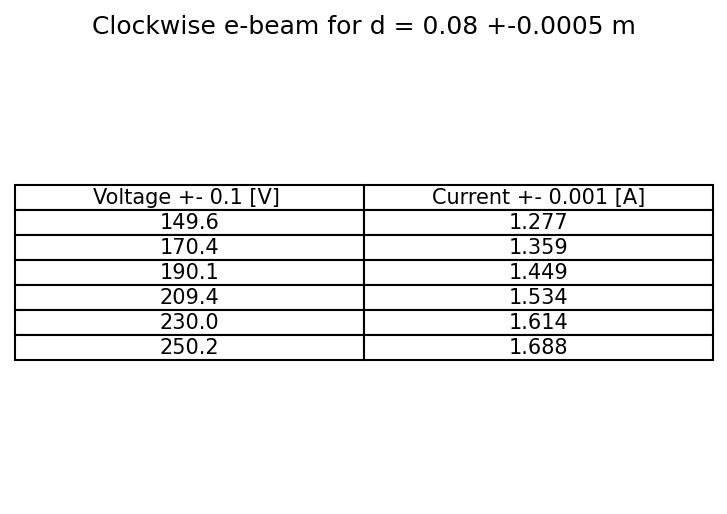

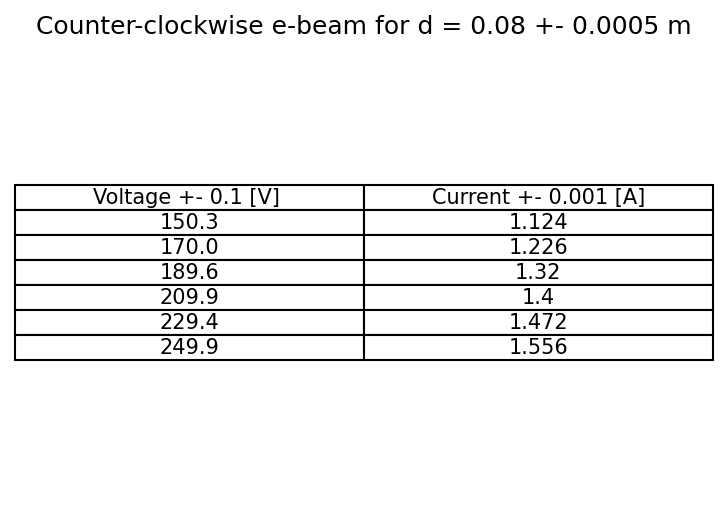

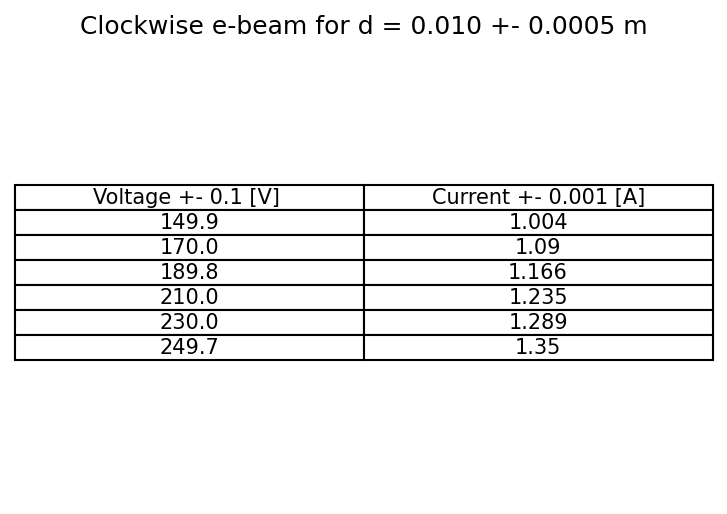

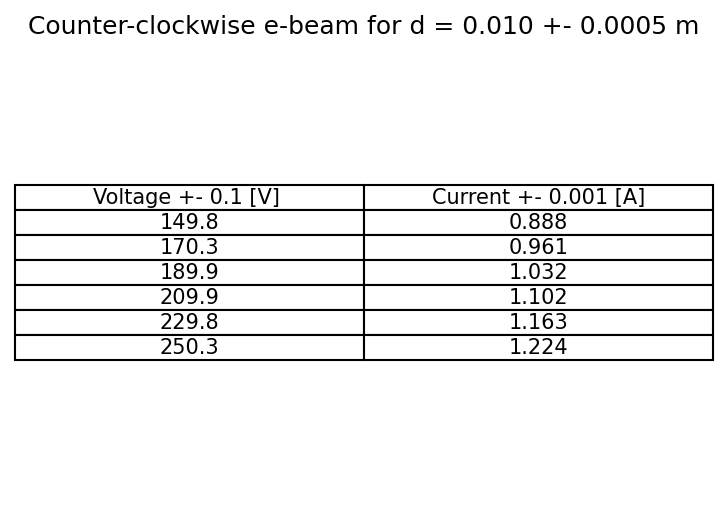

In [9]:
# making tables
data1 = np.column_stack((vc8_r, ic8))
data2 = np.column_stack((vcc8_r, icc8))
data3 = np.column_stack((vc10_r, ic10))
data4 = np.column_stack((vcc10_r, icc10))
def table(data1, N):
    fig, ax = plt.subplots(1,1)
    column_labels = ["Voltage +- 0.1 [V] ", "Current +- 0.001 [A]"]
    df =pd.DataFrame(data1, columns=column_labels)
    ax.axis('tight')
    ax.axis('off')
    if N == "vc8":
        plt.title("Clockwise e-beam for d = 0.08 +-0.0005 m")
    elif N == "vcc8":
        plt.title("Counter-clockwise e-beam for d = 0.08 +- 0.0005 m")
    elif N == "vc10":
        plt.title("Clockwise e-beam for d = 0.010 +- 0.0005 m")
    else:
        plt.title("Counter-clockwise e-beam for d = 0.010 +- 0.0005 m")
        
    ax.table(cellText=df.values, colLabels=df.columns, loc="center", cellLoc = "center")
    plt.show()
    
table(data1, "vc8")
table(data2, "vcc8")
table(data3, "vc10")
table(data4, "vcc10")

In [26]:
# calculating K with measured values
m0 = 1.25663706e-6 # permeability of free space in m kg s^-2 A^-2 or N/A^2
b = (15.0/2)/100 # diving 2b by 2 to get b and converting to m
b_error = (0.5/100)/2 # dividing by two because the error is given for 2b and converting to m
K = (m0*n*R**2)/(R**2 +(b)**2)**(3/2)
K_error = (b_error/b)*K
print("K from measured values = ", round(K*10000, 3), "e-4 +-", round(K_error, 7), "T/A")


K from measured values =  7.709 e-4 +- 2.57e-05 T/A


## Derivation of B

![ex 2.13](1.jpg)
![ex 2.13](2.jpg)
![ex 2.13](3.jpg)